# Classify
Supervised learning example: classify species in Fisher's iris dataset.

In [1]:
%autosave 0

from tools import *
from learn import Classify
from plot import Plot

plot = Plot(figsize=(5, 3))

Autosave disabled


## get data
Normalize columns so that coefficients are easier to compare.

In [2]:
clues = irisdata()
answers = clues.pop('species')
clues = zscores(clues)
clues.join(answers)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.897674,1.015602,-1.335752,-1.311052,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,setosa
3,-1.501490,0.097889,-1.279104,-1.311052,setosa
4,-1.018437,1.245030,-1.335752,-1.311052,setosa
...,...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994,virginica
146,0.551486,-1.278680,0.703564,0.919223,virginica
147,0.793012,-0.131539,0.816859,1.050416,virginica
148,0.430722,0.786174,0.930154,1.443994,virginica


## train a Classifier
Choose some random rows to reduce overfitting.

In [3]:
train = afew(clues, 70)
classy = Classify(train, answers[train.index])
classy.cats

['setosa', 'versicolor', 'virginica']

In [4]:
classy.coefs

,sepal_length,sepal_width,petal_length,petal_width
setosa,-2.692529,5.911445,-6.732085,-6.926141
versicolor,7.190629,-2.417527,-9.459518,-5.611873
virginica,-4.498100,-3.493918,16.191603,12.538015


In [5]:
classy.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
classy.model

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [7]:
classy.params

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

## guess classes
Call with new data to assign each row a class.

In [8]:
classes = classy(clues)
classes

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

## guess class probabilities
Only some models can do this.

In [9]:
probs = classy(clues, probs=True)
probs

,setosa,versicolor,virginica
0,9.999893e-01,1.073276e-05,2.507772e-36
1,9.862753e-01,1.372466e-02,1.855268e-31
2,9.999673e-01,3.266787e-05,1.060559e-33
3,9.999509e-01,4.914368e-05,1.532129e-31
4,9.999995e-01,4.813732e-07,3.604495e-37
...,...,...,...
145,5.136158e-13,1.610666e-06,9.999984e-01
146,1.621271e-12,4.140000e-04,9.995860e-01
147,7.049814e-10,1.211206e-04,9.998789e-01
148,7.207898e-11,2.035636e-10,1.000000e+00


## check results
How closely do the classes agree with reality?

species,setosa,versicolor,virginica
class,,,
setosa,49,1,0
versicolor,1,46,2
virginica,0,3,48


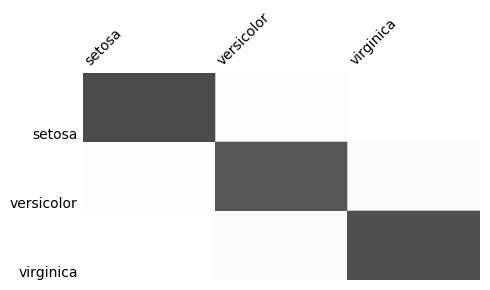

In [10]:
confusion = crosstab(classes, answers)
plot.heat(confusion, cmap='Greys')
confusion

## classify with different parameters

species,setosa,versicolor,virginica
class,,,
setosa,49,1,0
versicolor,1,49,6
virginica,0,0,44


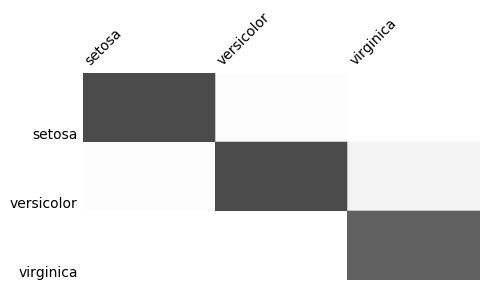

In [11]:
params = dict()
params['class_weight'] = 'balanced'
params['penalty'] = 'l1'
params['solver'] = 'liblinear'

train = afew(clues, 50)
classy = Classify(train, answers[train.index], **params)
confusion = crosstab(classy(clues), answers)
plot.heat(confusion, cmap='Greys')
confusion

## classify with another model

species,setosa,versicolor,virginica
class,,,
setosa,41,0,0
versicolor,9,49,16
virginica,0,1,34


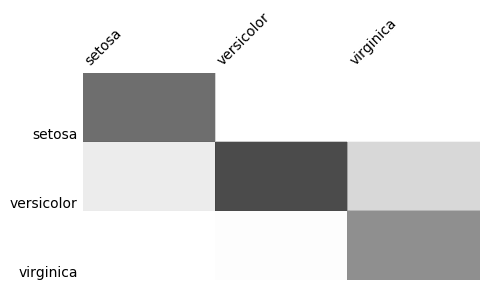

In [12]:
name = 'PassiveAggressiveClassifier'
train = afew(clues, 50)
classy = Classify(train, answers[train.index], model=name)
confusion = crosstab(classy(clues), answers)
plot.heat(confusion, cmap='Greys')
confusion

## help

In [13]:
help(Classify)

Help on class Classify in module learn:

class Classify(builtins.object)
 |  Classify(clues, answers, model='LogisticRegressionCV', **kwargs)
 |  
 |  Train, use, and re-use an automatic classifier.
 |  Input training data, then call with new data to return a Series.
 |  
 |  Constructor inputs:
 |      clues       DataFrame: Training data with numeric columns.
 |      answers     Iterable: Known classes. Must align with clues.
 |      model       optional str: Name of an sklearn.linear_model.
 |      **kwargs    will be passed to the chosen model.
 |  
 |  Call inputs:
 |      clues       DataFrame: Same columns as training 'clues'.
 |      probs       bool: Return a DataFrame of class probabilties?
 |  
 |  Note: Some models cannot return class probabilities.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, clues, probs=False)
 |      Call self as a function.
 |  
 |  __init__(self, clues, answers, model='LogisticRegressionCV', **kwargs)
 |      Initialize self.  See help(type(